In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import camb
import scipy as sp
from scipy import special
import numpy.fft 

<img src= 'Practica_5.jpg' width="600px">

Text(0, 0.5, ' $C_{ll}$')

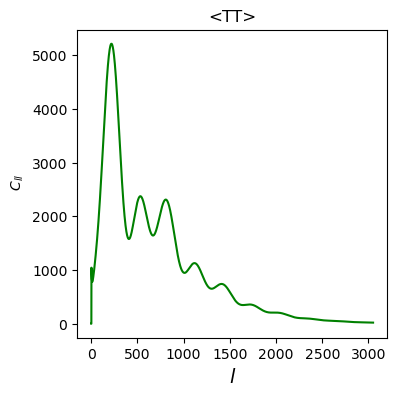

In [39]:
ps = camb.model.CAMBparams()
# we use CAMB directly, so first we need to define the cosmology, consider the parameters for a LCDM cosmology 
Omega_m = 0.3
Omega_l = 0,7 
H_0 = 70 
Omega_k = 0.0
h = 0.7 
ombh2 = 0.022
omch2=0.12
l_max = 20

#now we introduce the cosmology in CAMB 
ps.set_cosmology(H_0, ombh2, omch2,Omega_k)
# now, for the initial power spectrum we use the values from the documentation example
ps.InitPower.set_params(As=2e-09, ns=0.96, nrun=0, nrunrun=0.0, r=0.0, nt=None, ntrun=0.0, pivot_scalar=0.05, pivot_tensor=0.05, parameterization='tensor_param_rpivot')
# now we need to introduce the range where is the l_max for the CMB power spectra in the following form 
ps.set_for_lmax(3000, max_eta_k=None, lens_potential_accuracy=0)
#the results are generated by 
rs = camb.get_results(ps)
# and from the resu to the results we get the power spectrum
p_s =rs.get_cmb_power_spectra(ps,spectra = ('total', 'unlensed_scalar', 'unlensed_total', 'lensed_scalar', 'tensor', 'lens_potential'),CMB_unit='muK')
Cl_t = p_s['total']    
l_arange = np.arange(Cl_t.shape[0]) 
Cl_0 = Cl_t[:,0]

# and finally we plot the power spectrum
plt.plot(l_arange,Cl_0, color = 'green')
plt.title('<TT>')
plt.xlabel('$l$', fontsize = 14)
plt.ylabel(' $C_{ll}$')




### remember that the funcion's expansion in spherical harmonics is 
$$
h ( \theta, \phi) = \sum_{- l}^{l} a_{lm} Y_{l}^{m} (\theta, \phi)
$$

### so we need to finf the $a_{lm}$ coefficients

In [42]:
## the range for the angles are 
bins = 300
pi = np.pi 
phi = np.linspace(0, pi, bins)
theta = np.linspace(0, 2*pi, bins)

theta2, phi2 = np.meshgrid(theta,phi)
Cl_20 = Cl_t[1:21,0]
s_alm = np.sqrt(Cl_20)

n = 0 
delta = np.zeros((300,300), dtype = complex)
for l in range(1,21):
    for m in range(-l,l+1):
        n += 1
        a_lm = s_alm[l-1]*np.random.randn(1)
        delta += a_lm*sp.special.sph_harm(m,l,theta2,phi2)



[4.0, 4.0]

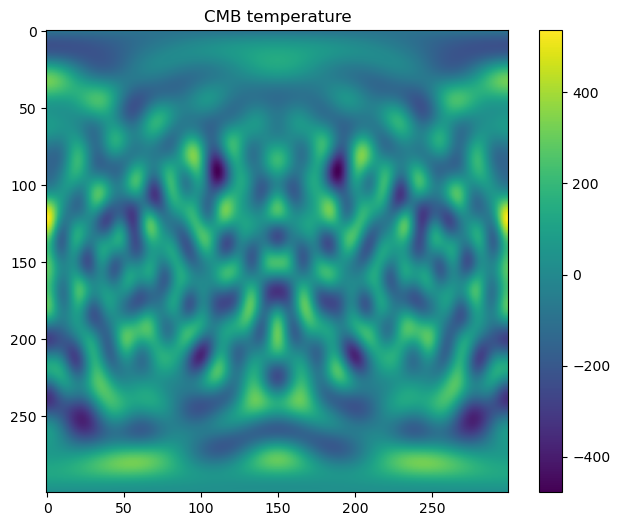

In [43]:

plt.figure(figsize=(8,6))
plt.imshow(delta.real)
plt.colorbar()
plt.title('CMB temperature')
plt.rcParams["figure.figsize"] 